In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

IBMQ.load_account()

provider = IBMQ.get_provider(group='open')
backend=provider.get_backend('ibmq_16_melbourne')

### Let's again create a Bell state in the following way:

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

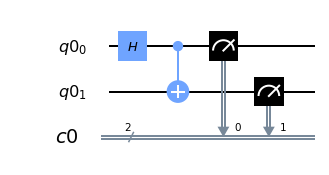

In [12]:
circuit.draw(output='mpl')

In [4]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
h q0[0];
cx q0[0],q0[1];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];



In [14]:
circuit.depth()

3

### Now we'll compile this circuit to see how the compiler (called in Qiskit transpiler) maps the circuit to match the backend architecture...

In [10]:
compiled_circuit = transpile(circuit, backend)

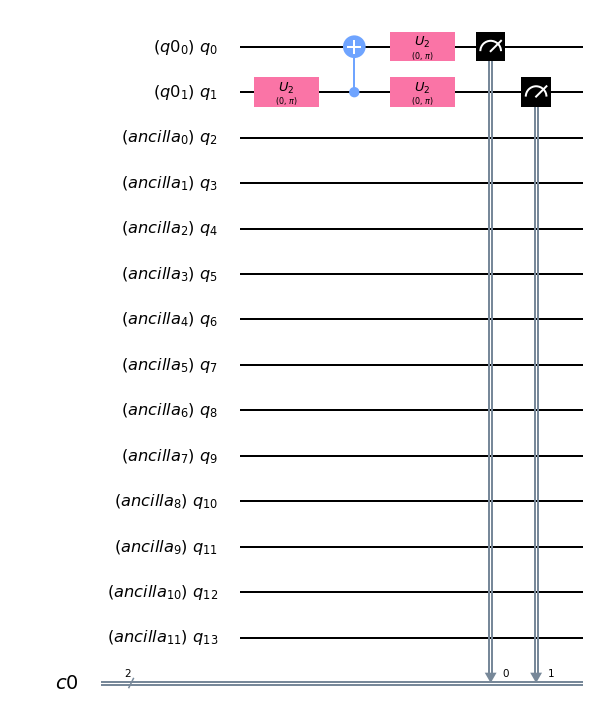

In [13]:
compiled_circuit.draw(output='mpl')

In [11]:
print(compiled_circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[14];
creg c0[2];
u2(0.0,3.14159265358979) q[1];
cx q[1],q[0];
u2(0.0,3.14159265358979) q[0];
u2(0.0,3.14159265358979) q[1];
measure q[0] -> c0[0];
measure q[1] -> c0[1];



In [15]:
compiled_circuit.depth()

4

### As we can see, the resulting circuit is more complex than the original one. We can note, that CNOT gate is applied the in the opposite way with control and target qubits switched. The reason for that is the topology of the backend allowing to apply CNOT gates only between well definedm and limited, pairs of qubits:

In [17]:
import pprint
pprint.pprint(backend.configuration().coupling_map)

[[1, 0],
 [1, 2],
 [2, 3],
 [4, 3],
 [4, 10],
 [5, 4],
 [5, 6],
 [5, 9],
 [6, 8],
 [7, 8],
 [9, 8],
 [9, 10],
 [11, 3],
 [11, 10],
 [11, 12],
 [12, 2],
 [13, 1],
 [13, 12]]


### We can see, that CNOT can be applied between [1,0] but not [0,1]! Additionally, it maps all the gates onto the fixed set of basic gates which are nativey implemented on the backend. In our case these are:

In [22]:
pprint.pprint(backend.configuration().basis_gates)

['u1', 'u2', 'u3', 'cx', 'id']


### Exercise: now create the original circuit in optimized way, knowing the backend topology, so that the compiled circuit is not more complex.

### Qiskit transpiler is very generic and can map input circuit to any architecture (it can receive coupling map as an input and other parameters which optimize the transpilation)

### Exercise: To further optimize our circuit, we can use the qubits with the smallest single and two qubit gate errors. Check with `backend_monitor` which ones these would be

## Exercise: Compile the bell state circuit with CNOT gate between quibits, which are not physically connected. Check how the compiled circuit loks like.